<img src="Header Curso 2.png" width="921" height="89" align="center"/>

<h1><center>Modelos predictivos con Machine Learning - AnáhuacX</center></h1>
<h2><center>Actividad 3: Optimización de modelos</center></h2>


En el siguiente ejercicio practicarás algunos de los comandos vistos durante la semana. Después de terminar tu practica responderás un formulario donde autoevaluaras tu desarrollo. <strong>Al finalizar deberás subir tu cuaderno en un archivo .zip</strong>. Es muy importante que subas tu cuaderno de la manera en cómo se indica.

En esta actividad responderás la pregunta: 
¿Como optimizar nuestros modelos de predicción con Python? Para responderla deberás seguir los pasos a detalle.


<h3><center>Instrucciones</center></h3>

1. Ejecuta la siguiente linea de código para cargas las librerías fundamentales que se utilzarán durante el ejercicio y asegurar la reproducibilidad del mismo.

In [162]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1) 

<h4>Aplicando la regresión</h4>

2. Descarga y descomprime la base de datos <a href="https://courses.edx.org/asset-v1:AnahuacX+UVA-CP1-1x+3T2020+type@asset+block@cardiovascular-disease-dataset.zip">cardio_train</a> (El archivo extraído debe de colocarse en la misma carpeta que este cuaderno). Abre el archivo con el paquete pandas. Recuerda usar el parametro `index_col=0` para indicar que la columna número cero es el índice. Este archivo separa los valores con el caracter `;`, por lo tanto usa el parametro `sep=';`. Guarda el conjnto de datos como variable `df`.

In [163]:
df = pd.read_csv('cardio_train.csv', sep = ';', index_col = 0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


3. __¿Cuál es el peso del tercer individuo?__

In [164]:
print('el peso del tercero es', df.weight[2], 'kg')

el peso del tercero es 64.0 kg


***

Las variables de estudio son:

<table>
    <thead>
    <tr bgcolor="darkorange">
        <th style="text-align:center;">Nombre de variable</th><th style="text-align:center;">Descripción</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:center;">age</td><td style="text-align:center;">Edad en días.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">gender</td><td style="text-align:center;">Genero del paciente.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">height</td><td style="text-align:center;">Altura en centímetros.</td>
    </tr>
    <tr>
        <td style="text-align:center;">weight</td><td style="text-align:center;">Peso en kg.</td>
    </tr>
    <tr>
        <td style="text-align:center;">ap_hi</td><td style="text-align:center;">Presión arterial sistólica</td>
    </tr>
    <tr>
        <td style="text-align:center;">ap_lo</td><td style="text-align:center;">Presión arterial diastólica.</td>
    </tr>
    <tr>
        <td style="text-align:center;">cholesterol</td><td style="text-align:center;">Colesterol. 1: normal, 2: alto, 3: muy alto.</td>
    </tr>
    <tr>
        <td style="text-align:center;">gluc</td><td style="text-align:center;">Glucosa. 1: normal, 2: alto, 3: muy alto.</td>
    </tr>
    <tr>
        <td style="text-align:center;">smoke</td><td style="text-align:center;">Paciente es fumador</td>
    </tr>
    <tr>
        <td style="text-align:center;">alco</td><td style="text-align:center;">Paciente toma bebidas alcohólicas</td>
    </tr>
    <tr>
        <td style="text-align:center;">active</td><td style="text-align:center;">Paciente es activo físicamente</td>
    </tr>
    <tr>
        <td style="text-align:center;">cardio</td><td style="text-align:center;">Variable por predecir. El paciente tiene una enfermedad cardiovascular.</td>
    </tr>
    </tbody>
</table>

4. Analiza el conjunto de datos, __¿que variables necesitan ser convertidas en variables dummy?__. Prepara los datos utilizando las variables Dummy para representar las columnas que tengan variables donde existan dos o más categorías diferentes. 

gender, smoke, alco, active

cholesterol normal (cholesterol_normal), cholesterol alto (cholesterol_alto), cholesterol muy alto (cholesterol_muy_alto)

glucosa normal (gluc_normal), glucosa alto (gluc_alto), glucosa muy alto (gluc_muy_alto)

In [165]:
df['cholesterol'] = df['cholesterol'].replace(1,'normal').replace(2,'alto').replace(3, 'muy_alto')
df['gluc'] = df['gluc'].replace(1,'normal').replace(2,'alto').replace(3, 'muy_alto')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,1,156,85.0,140,90,muy_alto,normal,0,0,1,1
2,18857,1,165,64.0,130,70,muy_alto,normal,0,0,0,1
3,17623,2,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,1,156,56.0,100,60,normal,normal,0,0,0,0


In [178]:
columns_to_dummy = df.columns[df.dtypes == np.object]
columns_to_dummy

Index(['cholesterol', 'gluc'], dtype='object')

In [179]:
df_w_dummy = pd.get_dummies(df,prefix=columns_to_dummy)
df_w_dummy.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_alto,cholesterol_muy_alto,cholesterol_normal,gluc_alto,gluc_muy_alto,gluc_normal
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,0,0,1,0,0,1
1,20228,1,156,85.0,140,90,0,0,1,1,0,1,0,0,0,1
2,18857,1,165,64.0,130,70,0,0,0,1,0,1,0,0,0,1
3,17623,2,169,82.0,150,100,0,0,1,1,0,0,1,0,0,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1,0,0,1


***

5. Tenemos que separar los datos en conjuntos de entrenamiento y prueba.
Utiliza el método `train_test_split` del paquete `sklearn.model_selection` para separar en `X_train,X_test,y_train y y_test`.

Utiliza el parámetro `random_state=1` para garantizar la reproducibilidad y `test_size=0.2` para definir una separación del 80/20.

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [181]:
# datos
X = df_w_dummy.drop("cardio", axis = 1)
X = MinMaxScaler().fit_transform(X) # normalizacion de los datos

# variable que predecimos
Y= df_w_dummy.cardio
Y = MinMaxScaler().fit_transform(Y.values.reshape(-1, 1)) # normalizacion de los datos

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

***
6. Identifica, dentro del nuevo conjunto de datos, cuáles son las características más relevantes que impactan más en el resultado. Debes utilizar la librería `sklearn.feature_selection` para realizar este paso. Detecta las 5 más importantes.

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # la variable que tenemos que predecir es booleana => ley binomiala => regresion logistica

In [184]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(solver = 'lbfgs')
selector = RFE(estimator, 5, step = 1)
selector = selector.fit(X_train, Y_train.ravel())

print(selector.support_)
print(selector.ranking_)

C:\Users\Juliette\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Juliette\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Juliette\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

[ True False  True  True  True  True False False False False False False
 False False False]
[ 1 10  1  1  1  1  7  8  5  6  2  3  9  4 11]


7. __¿Cuáles las 5 variables más relevantes?__

In [185]:
lista = selector.ranking_ 

In [186]:
df_w_dummy.columns[np.where(lista == 1)] # variables mas relevant

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

***
8. Crear un modelo de regresión logística que represente a nuestro conjunto de datos.

In [194]:
modelo = LogisticRegression(solver = 'saga').fit(X_train, Y_train.ravel()) # largo nombre de datos => tenemos que cambiar el algoritmo del solver
Y_train_pred = modelo.predict(X_train)
Y_test_pred = modelo.predict(X_test)

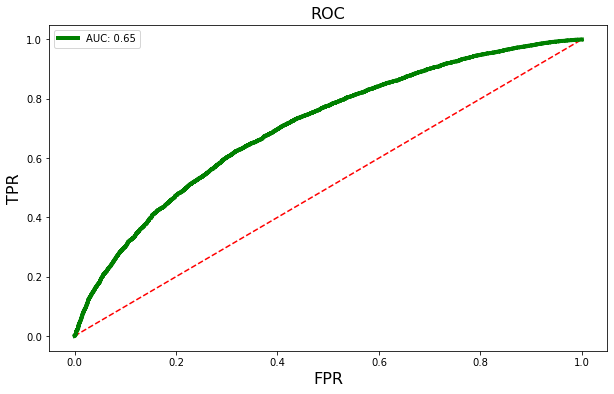

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = modelo.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)
roc_auc = roc_auc_score(Y_test, Y_test_pred)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

***
9. Evalúa el modelo usando una curva ROC

Regla de dedo para un área bajo la curva en una curva ROC es:

- [0.5]: Equivalente a aleatorio.
- [0.5, 0.6): Test malo.
- [0.6, 0.75): Test regular.
- [0.75, 0.9): Test bueno.
- [0.9, 0.95): Test muy bueno.
- [0.95, 1): Muy bueno para ser cierto.

10. __¿Cuánto score se obtiene con la curva ROC?__

In [196]:
roc_auc_score(Y_test, Y_test_pred)

0.6512643277541613

***
__Contesta en el foro: ¿Que estrategias puedes tomar para mejorarlo?__

12. Guarda tu libreta y colócala en una carpeta comprimida con extensión .zip. Sube el archivo .zip a la plataforma de EdX y califica los ejercicios de tus demás compañeros.

<img src="Anáhuac_edX.png" width="498" height="150" align="center"/>